In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv


In [2]:
df=pd.read_csv('/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [5]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [6]:
len(df)

1718

In [7]:
import datetime
df['date_parsed']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
df['day_of_month']=(df['date_parsed'].dt.day).astype(int)
df['month_of_year']=(df['date_parsed'].dt.month).astype(int)
df['year']=(df['date_parsed'].dt.year).astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1718 non-null   object        
 1   Open           1718 non-null   float64       
 2   High           1718 non-null   float64       
 3   Low            1718 non-null   float64       
 4   Close          1718 non-null   float64       
 5   Adj Close      1718 non-null   float64       
 6   Volume         1718 non-null   int64         
 7   SP_open        1718 non-null   float64       
 8   SP_high        1718 non-null   float64       
 9   SP_low         1718 non-null   float64       
 10  SP_close       1718 non-null   float64       
 11  SP_Ajclose     1718 non-null   float64       
 12  SP_volume      1718 non-null   int64         
 13  DJ_open        1718 non-null   float64       
 14  DJ_high        1718 non-null   float64       
 15  DJ_low         1718 n

In [9]:
df.drop(['Date','date_parsed'],inplace=True,axis=1)

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,day_of_month,month_of_year,year
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,15,12,2011
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,16,12,2011
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,19,12,2011
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,20,12,2011
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,21,12,2011


In [11]:
# train test split
X=df

In [12]:
y=X.pop('Adj Close')

In [13]:
from sklearn.tree import DecisionTreeRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
X_train,y_train=X[0:int(0.7*len(X))],y[0:int(0.7*len(y))]

In [15]:
X_train[:-1]

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,day_of_month,month_of_year,year
0,154.740005,154.949997,151.710007,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,15,12,2011
1,154.309998,155.369995,153.899994,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,16,12,2011
2,155.479996,155.860001,154.360001,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,...,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,19,12,2011
3,156.820007,157.429993,156.580002,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,...,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,20,12,2011
4,156.979996,157.529999,156.130005,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,...,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,21,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,113.870003,113.879997,112.650002,113.250000,20864900,219.979996,220.759995,219.750000,220.699997,211.210785,...,122610500,10.600000,10.770000,10.560000,10.670000,10.670000,25907100,23,11,2016
1197,113.419998,113.510002,112.349998,112.610001,5345900,221.100006,221.559998,221.009995,221.520004,211.995529,...,34433900,10.500000,10.550000,10.280000,10.330000,10.330000,29733900,25,11,2016
1198,113.230003,113.839996,112.769997,113.800003,5655400,221.160004,221.479996,220.360001,220.479996,211.000229,...,100582700,10.470000,10.600000,10.350000,10.440000,10.440000,58180100,28,11,2016
1199,112.760002,113.480003,112.690002,113.269997,7438600,220.520004,221.440002,220.169998,220.910004,211.411743,...,50015500,10.100000,10.150000,9.970000,10.060000,10.060000,66923800,29,11,2016


In [16]:
X_test,y_test=X[int(0.7*len(X)):len(X)],y[int(0.7*len(X)):len(X)]

In [17]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [18]:
xgbr.score(X_train,y_train)

0.9999984581887557

In [19]:
from sklearn.metrics import mean_squared_error
y_pred=xgbr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('The mean squared error is ',mse)

The mean squared error is  0.08902294171364705


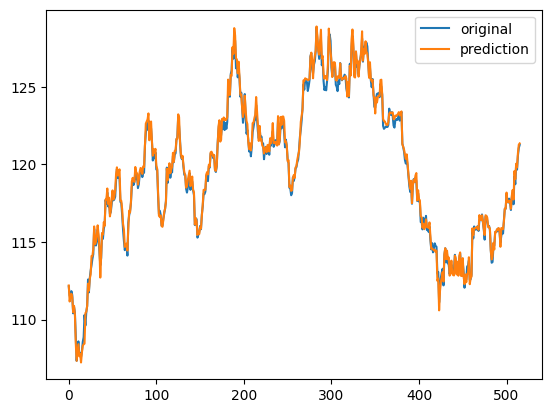

In [20]:
import matplotlib.pyplot as plt
x_test_label=range(len(y_test))
x_pred_label=range(len(y_pred))
plt.plot(x_test_label,y_test,label='original')
plt.plot(x_pred_label,y_pred,label='prediction')
plt.legend()
plt.show()